In [468]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.nunique().sort_values()

y                    2
contact              2
default              3
housing              3
loan                 3
poutcome             3
marital              4
day_of_week          5
education            8
previous             8
emp.var.rate        10
month               10
nr.employed         11
job                 12
cons.price.idx      26
cons.conf.idx       26
pdays               27
campaign            42
age                 78
euribor3m          316
duration          1544
dtype: int64

There are no NaN values

## Checking for duplicates

In [10]:
df.duplicated().sum()

12

Seeing and droping duplicates:

In [12]:
df.loc[df.duplicated(), :]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [13]:
df.drop_duplicates(keep='first', inplace=True)

In [14]:
cols_to_drop = []

## Target column

In [16]:
df.y.value_counts(normalize=True)

y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64

This shows class imbalance ( 11 % YES, 89% NO) 

## Numerical columns

In [19]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [20]:
describe_df = df.describe().T
describe_df['range'] = describe_df['max'] - describe_df['min']
describe_df['skewnes_hint'] = describe_df['mean'] - describe_df['50%']
describe_df

,count,mean,std,min,25%,50%,75%,max,range,skewnes_hint
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000,81.000,2.023800
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000,4918.000,78.315815
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000,55.000,0.567879
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000,999.000,-36.535190
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000,7.000,0.173013
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400,4.800,-1.018078
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767,2.566,-0.173280
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900,23.900,1.297137
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045,4.411,-1.235707
nr.employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100,264.500,-23.965130


### Age column

Range = 81 is big. Mean and median are close.
Max = 98 is too old, but it can be. 
Min = 17, it's okay, bank can have young client.

Let's look at histogram and boxpolot

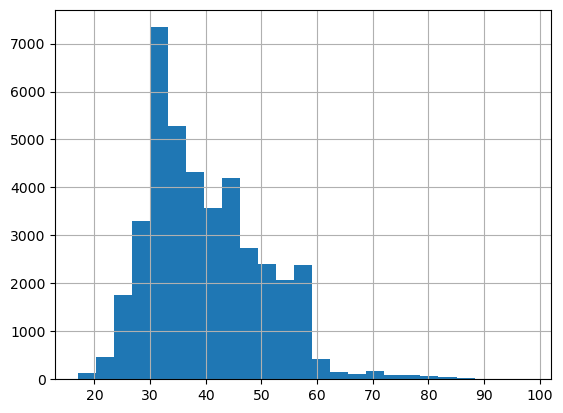

In [24]:
df.age.hist(bins=25)
plt.show()

Right skewness - most values are left. I will decide later if I want to transform it.

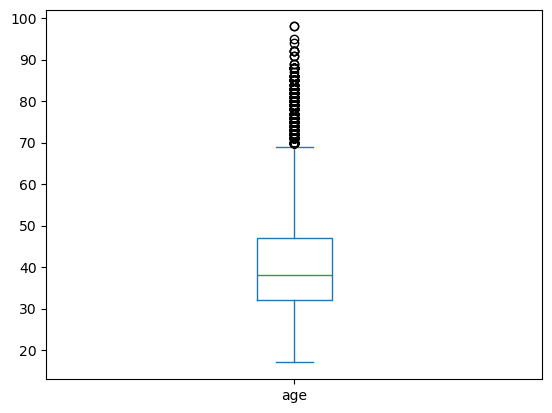

In [26]:
df.age.plot(kind='box')
plt.show()

There are a lot outliers, but I'm gonna leave them

### Duration column - last contact duration, in seconds

This attribute highly affects the output target (e.g., if duration=0 then y="no"). Even if there is no zero, the duration is still too highly correlated with the target – longer conversation → more likely yes. It is not a "natural" connection but a consequence of campaign logic (eg. the agent talks longer if the client is interested).
Model using duration can learn the target directly, leading to unrealistically high accuracy on the training set—but poor generalization. I will drop this column later.

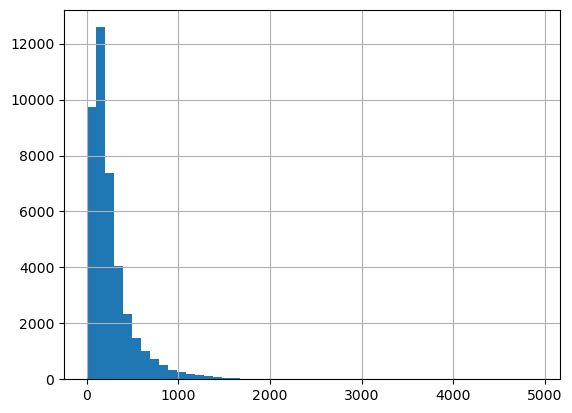

In [30]:
df.duration.hist(bins=50)
plt.show()

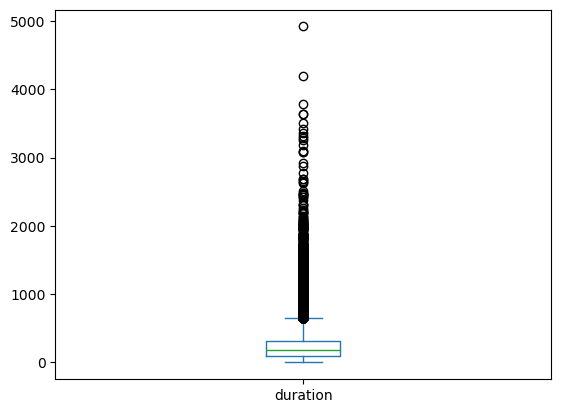

In [31]:
df.duration.plot(kind='box')
plt.show()

In [32]:
df[df.duration == 0]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,0,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,0,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,0,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,0,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


In [33]:
df.groupby('y').duration.describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36537.0,220.868079,207.116178,0.0,95.0,164.0,279.0,4918.0
yes,4639.0,553.256090,401.190736,37.0,253.5,449.0,741.5,4199.0


Duration of calls when client says YES last twice as long as when client say NO. Median is almost three times larger for y=YES (449s) than y=NO (163.5).
Let's see distributons.

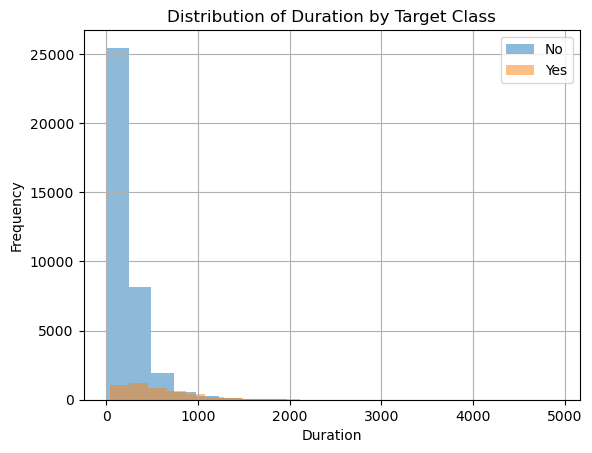

In [35]:
# Histogram for target equals to NO
df[df.y == 'no'].duration.hist(alpha=0.5, bins=20, label='No')
# Histogram for target equals to YES
df[df.y == 'yes'].duration.hist(alpha=0.5, bins=20, label='Yes')

plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Duration by Target Class')
plt.show()

In [36]:
cols_to_drop.append('duration')

### Campaign - number of contacts performed during this campaign and for this client

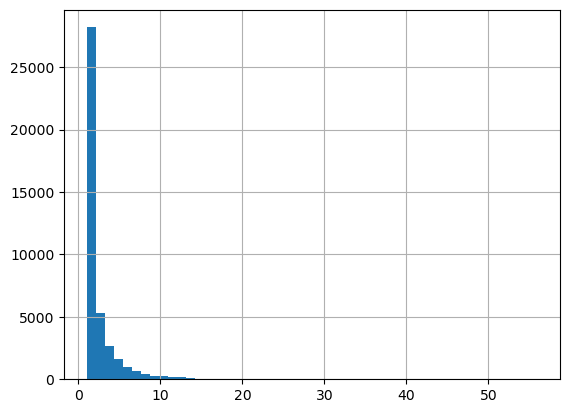

In [38]:
df.campaign.hist(bins=50)
plt.show()

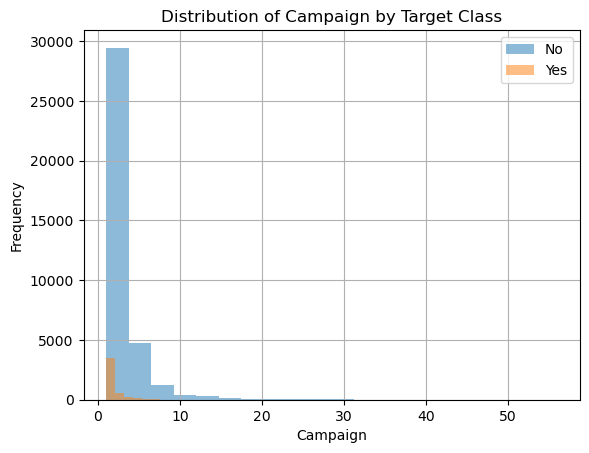

In [39]:
# Histogram for target equals to NO
df[df.y == 'no'].campaign.hist(alpha=0.5, bins=20, label='No')
# Histogram for target equals to YES
df[df.y == 'yes'].campaign.hist(alpha=0.5, bins=20, label='Yes')

plt.xlabel('Campaign')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Campaign by Target Class')
plt.show()

Distributons are both right skewed. I can transform it later

In [41]:
df.groupby('y').campaign.describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36537.0,2.633385,2.873768,1.0,1.0,2.0,3.0,56.0
yes,4639.0,2.051951,1.666353,1.0,1.0,2.0,2.0,23.0


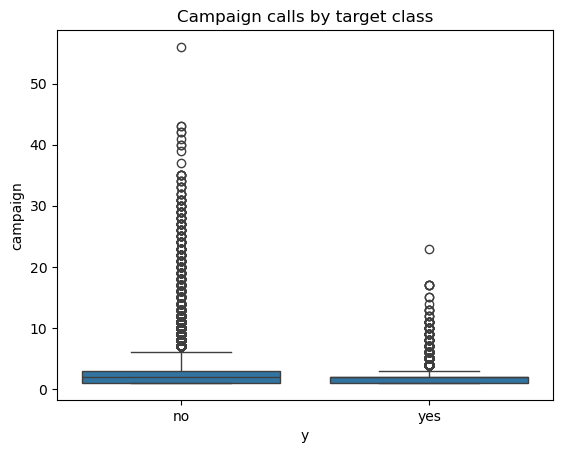

In [42]:
sns.boxplot(x='y', y='campaign', data=df)
plt.title('Campaign calls by target class')
plt.show()

It seems that more calls do not automatically mean a higher chance of "yes", it is even less on average for "yes". It is likely that those who say "no" are contacted more often or longer. Which make sense. Clients that said YES they would be contancted later, and ones that said NO will be contancted again since they said NO, and bank wants YES.

In [44]:
df.campaign.value_counts()

campaign
1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: count, dtype: int64

Most values are in range (1-5)

I am not gonna use this column, since there is some kind of leakage here, between campaign column and target.

In [47]:
cols_to_drop.append('campaign')

### pdays - number of days that passed by after the client was last contacted from a previous campaign

999 means client was not previously contacted

In [50]:
df.pdays.value_counts().sort_index()

pdays
0         15
1         26
2         61
3        439
4        118
5         46
6        412
7         60
8         18
9         64
10        52
11        28
12        58
13        36
14        20
15        24
16        11
17         8
18         7
19         3
20         1
21         2
22         3
25         1
26         1
27         1
999    39661
Name: count, dtype: int64

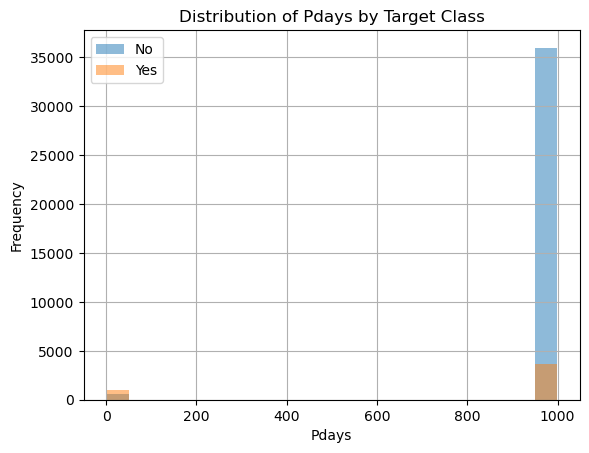

In [51]:
# Histogram for target equals to NO
df[df.y == 'no'].pdays.hist(alpha=0.5, bins=20, label='No')
# Histogram for target equals to YES
df[df.y == 'yes'].pdays.hist(alpha=0.5, bins=20, label='Yes')

plt.xlabel('Pdays')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Pdays by Target Class')
plt.show()

In [52]:
df.groupby('y').pdays.describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36537.0,984.109396,120.674753,0.0,999.0,999.0,999.0,999.0
yes,4639.0,791.990946,403.439220,0.0,999.0,999.0,999.0,999.0


In [53]:
df['pdays_999'] = df['pdays'] == 999
df.groupby(['y', 'pdays_999']).size().unstack()

pdays_999,False,True
y,,
no,548,35989
yes,967,3672


Only 1.5% of those who said "no" were contacted before (548 / 36548).

And even 20.8% of those who said "yes" were contacted before (967 / 4640).

This implies that customers who have been contacted before are more likely to say "yes", which is valuable information.


I'm going to make new binary column: 0 for pdays value equals to 999 and 1 for pdays value doesn't equal to 999

In [56]:
df['pdays_was_contacted'] = (df['pdays'] != 999).astype(int)

And drop pdays column

In [58]:
cols_to_drop.append('pdays')

### Previous column - number of contacts performed before this campaign and for this client

This column is information from previous campaign

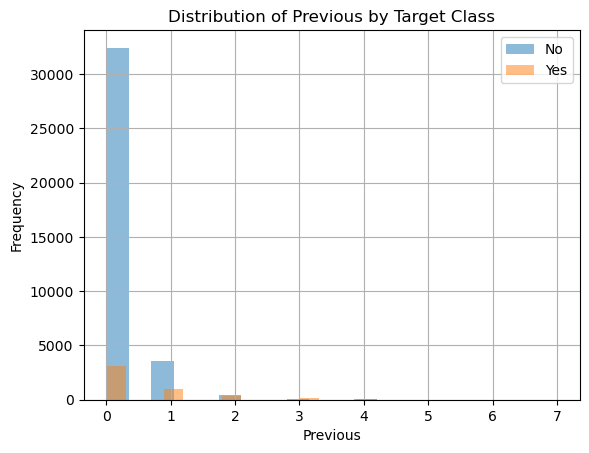

In [61]:
# Histogram for target equals to NO
df[df.y == 'no'].previous.hist(alpha=0.5, bins=20, label='No')
# Histogram for target equals to YES
df[df.y == 'yes'].previous.hist(alpha=0.5, bins=20, label='Yes')

plt.xlabel('Previous')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Previous by Target Class')
plt.show()

In [62]:
df.previous.value_counts().sort_index()

previous
0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

In [63]:
round((df.previous.value_counts().sort_index()[0]) / df.shape[0],2)

0.86

86% observations have 0 value for previous column, meaning that 86% clients have not been contacted before.

So, I'm gonna make new binary column: 0 fro previous value 0, and 1 for previous value not 0

In [65]:
df['was_previously_contacted'] = (df['previous'] > 0).astype(int)

And drop previous column

In [67]:
cols_to_drop.append('previous')

### emp.var.rate - employment variation rate - quarterly indicator

In [69]:
df['emp.var.rate'].value_counts()

emp.var.rate
 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: count, dtype: int64

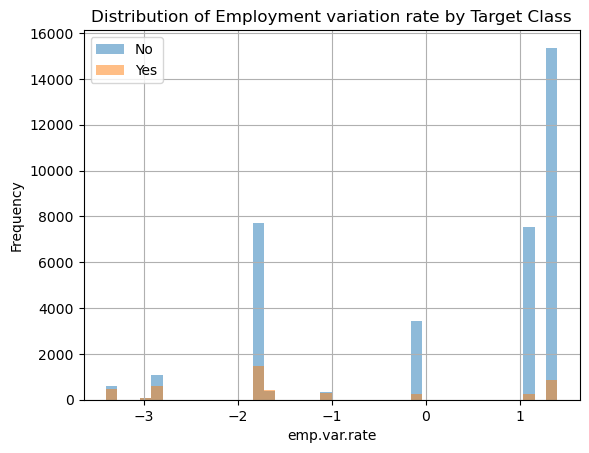

In [70]:
# Histogram for target equals to NO
df[df.y == 'no']['emp.var.rate'].hist(alpha=0.5, bins=40, label='No')
# Histogram for target equals to YES
df[df.y == 'yes']['emp.var.rate'].hist(alpha=0.5, bins=40, label='Yes')

plt.xlabel('emp.var.rate')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Employment variation rate by Target Class')
plt.show()

In [71]:
df.groupby('y')['emp.var.rate'].value_counts(normalize=True)

y    emp.var.rate
no    1.4            0.420451
     -1.8            0.211320
      1.1            0.205873
     -0.1            0.094425
     -2.9            0.029258
     -3.4            0.016860
     -1.7            0.010127
     -1.1            0.009141
     -3.0            0.002299
     -0.2            0.000246
yes  -1.8            0.314939
      1.4            0.186678
     -2.9            0.127829
     -3.4            0.097866
     -1.7            0.086872
     -1.1            0.064885
      1.1            0.051735
     -0.1            0.050011
     -3.0            0.018970
     -0.2            0.000216
Name: proportion, dtype: float64

In [72]:
rate_df = df.groupby(['y','emp.var.rate']).size().unstack(level=0)

rate_df['no_pct'] = rate_df['no']/rate_df['no'].sum()
rate_df['yes_pct'] = rate_df['yes']/rate_df['yes'].sum()

rate_df = rate_df[['no_pct', 'yes_pct']]
rate_df = rate_df.sort_index(ascending=False)
display(rate_df.style.format({'no_pct': "{:.2%}", 'yes_pct': "{:.2%}"}))

y,no_pct,yes_pct
emp.var.rate,,
1.400000,42.05%,18.67%
1.100000,20.59%,5.17%
-0.100000,9.44%,5.00%
-0.200000,0.02%,0.02%
-1.100000,0.91%,6.49%
-1.700000,1.01%,8.69%
-1.800000,21.13%,31.49%
-2.900000,2.93%,12.78%
-3.000000,0.23%,1.90%


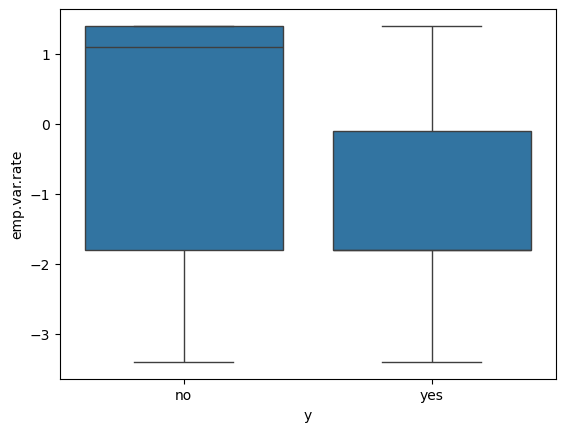

In [73]:
sns.boxplot(x='y', y='emp.var.rate', data=df)
plt.show()

There is strong diffrence between distributions of classes, so we'll keep this column

### cons.price.idx - consumer price index - monthly indicator

In [76]:
df.groupby('y')['cons.price.idx'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36537.0,93.603798,0.559006,92.201,93.075,93.918,93.994,94.767
yes,4639.0,93.354577,0.676592,92.201,92.893,93.200,93.918,94.767


Standar deviation is small, so values are close to each other. 

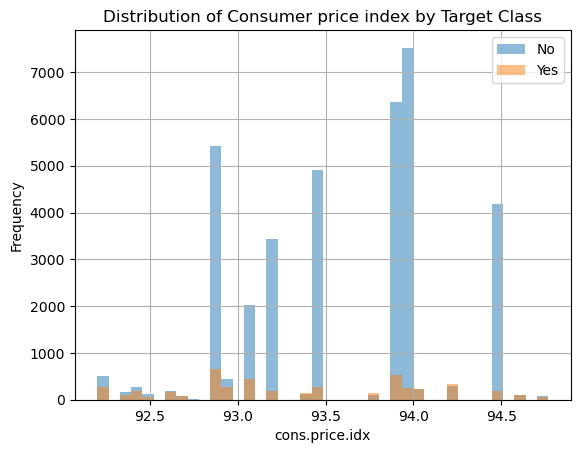

In [78]:
# Histogram for target equals to NO
df[df.y == 'no']['cons.price.idx'].hist(alpha=0.5, bins=40, label='No')
# Histogram for target equals to YES
df[df.y == 'yes']['cons.price.idx'].hist(alpha=0.5, bins=40, label='Yes')

plt.xlabel('cons.price.idx')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Consumer price index by Target Class')
plt.show()

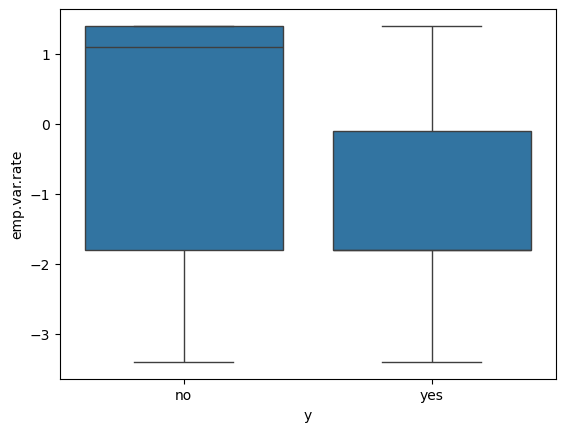

In [79]:
sns.boxplot(x='y', y='emp.var.rate', data=df)
plt.show()

###  cons.conf.idx - consumer confidence index - monthly indicator 

In [81]:
df.groupby('y')['cons.conf.idx'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36537.0,-40.593232,4.390759,-50.8,-42.7,-41.8,-36.4,-26.9
yes,4639.0,-39.791119,6.139657,-50.8,-46.2,-40.4,-36.1,-26.9


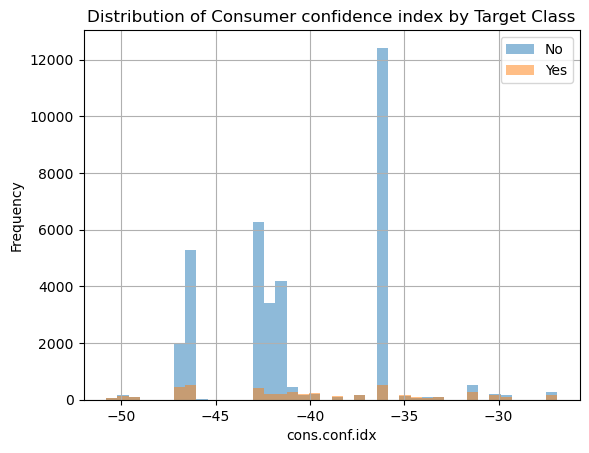

In [82]:
# Histogram for target equals to NO
df[df.y == 'no']['cons.conf.idx'].hist(alpha=0.5, bins=40, label='No')
# Histogram for target equals to YES
df[df.y == 'yes']['cons.conf.idx'].hist(alpha=0.5, bins=40, label='Yes')

plt.xlabel('cons.conf.idx')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Consumer confidence index by Target Class')
plt.show()

People who accepted the offer (yes) had, on average, more confidence in the economy (ie, less negative values).

### euribor3m - euribor 3 month rate - daily indicator

In [85]:
df.groupby('y')['euribor3m'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36537.0,3.811482,1.638179,0.634,1.405,4.857,4.962,5.045
yes,4639.0,2.123362,1.742717,0.634,0.849,1.266,4.406,5.045


Clients who said "yes" have significantly lower euribor3m values ​​on average than those who said "no".

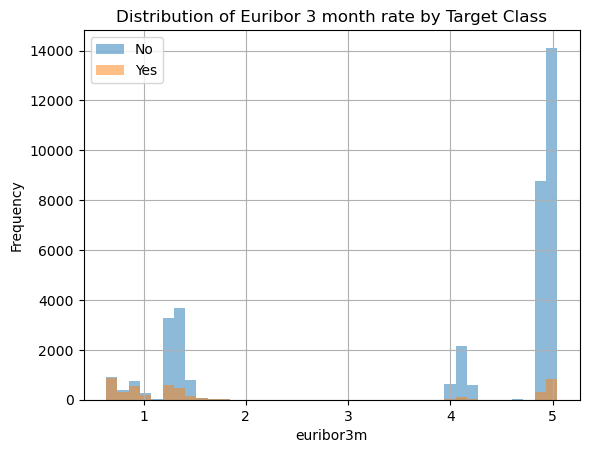

In [87]:
# Histogram for target equals to NO
df[df.y == 'no']['euribor3m'].hist(alpha=0.5, bins=40, label='No')
# Histogram for target equals to YES
df[df.y == 'yes']['euribor3m'].hist(alpha=0.5, bins=40, label='Yes')

plt.xlabel('euribor3m')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Euribor 3 month rate by Target Class')
plt.show()

### nr.employed - number of employees - quarterly indicator

In [89]:
df.groupby('y')['nr.employed'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36537.0,5176.165690,64.570288,4963.6,5099.1,5195.8,5228.1,5228.1
yes,4639.0,5095.120069,87.581640,4963.6,5017.5,5099.1,5191.0,5228.1


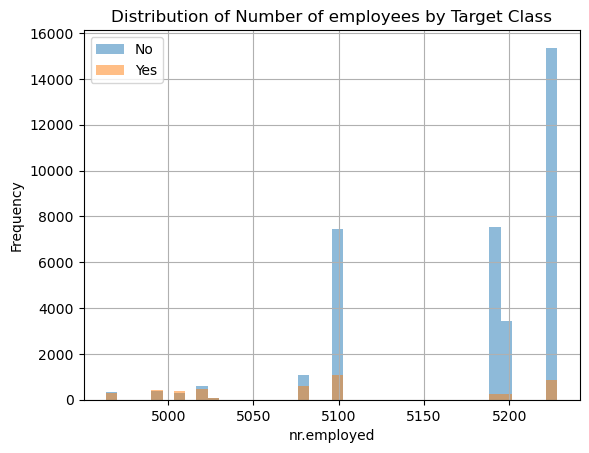

In [90]:
# Histogram for target equals to NO
df[df.y == 'no']['nr.employed'].hist(alpha=0.5, bins=40, label='No')
# Histogram for target equals to YES
df[df.y == 'yes']['nr.employed'].hist(alpha=0.5, bins=40, label='Yes')

plt.xlabel('nr.employed')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Number of employees by Target Class')
plt.show()

## Categorical columns

In [92]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

### job - type of job 

categorical: "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown")

In [95]:
df.job.value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [96]:
pd.crosstab(df['job'], df['y'], normalize='index')

y,no,yes
job,,
admin.,0.870333,0.129667
blue-collar,0.931049,0.068951
entrepreneur,0.914835,0.085165
housemaid,0.900000,0.100000
management,0.887825,0.112175
retired,0.747381,0.252619
self-employed,0.895144,0.104856
services,0.918578,0.081422
student,0.685714,0.314286


We can see that most likely clints that will say YES is the ones that has these jobs:
- students (31%)
- retired (25%)
- unempoyed (14%) 

And least likely, has these jobs:
- blue-collar(6,6%)
- entrepreneur (8,5%)

### marital -  marital status

categorical: "divorced", "married", "single", "unknown" ; note: "divorced" means divorced or widowed

In [101]:
df.marital.value_counts()

marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

In [102]:
pd.crosstab(df['marital'], df['y'], normalize='index')

y,no,yes
marital,,
divorced,0.896769,0.103231
married,0.898439,0.101561
single,0.859910,0.140090
unknown,0.850000,0.150000


We see that single people will more likely say YES, than married and divorced. Unknown is not that interpretable. 

### education 

categorical: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown"

In [106]:
df.education.value_counts()

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

In [107]:
df.groupby('y')['education'].value_counts(normalize=True).unstack()

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
y,,,,,,,,
no,0.102581,0.057558,0.152503,0.232121,0.000383,0.127131,0.287243,0.040480
yes,0.092261,0.040526,0.101962,0.222246,0.000862,0.128260,0.359776,0.054106


### default - has credit in default?

categorical: "no", "yes", "unknown"

In [110]:
df.default.value_counts()

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

Class 'no' is dominant class here, class 'yes' is too rare and class 'unknown' makes 20% of the data,  which introduces uncertainty.

In [112]:
pd.crosstab(df['default'], df['y'], normalize='index')

y,no,yes
default,,
no,0.871197,0.128803
unknown,0.948464,0.051536
yes,1.000000,0.000000


There is no usefull information here, so I will drop this column

In [114]:
cols_to_drop.append('default')

### housing - has housing loan?

categorical: "no", "yes", "unknown"

In [117]:
df.housing.value_counts()

housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64

In [118]:
pd.crosstab(df['housing'], df['y'], normalize='index')

y,no,yes
housing,,
no,0.891217,0.108783
unknown,0.891919,0.108081
yes,0.883779,0.116221


I will keep this column and enocoded later

### loan - has personal loan?

categorical: "no", "yes", "unknown"

In [122]:
df.loan.value_counts()

loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64

In [123]:
pd.crosstab(df['loan'], df['y'], normalize='index')

y,no,yes
loan,,
no,0.886587,0.113413
unknown,0.891919,0.108081
yes,0.890685,0.109315


There is not much difference with respect to loan status, which means that this column may not have a strong predictive potential for our objective y.

### contact - contact communication type

categorical: "cellular", "telephone"

In [127]:
df.contact.value_counts()

contact
cellular     26135
telephone    15041
Name: count, dtype: int64

In [128]:
pd.crosstab(df['contact'], df['y'], normalize='index')

y,no,yes
contact,,
cellular,0.852611,0.147389
telephone,0.947676,0.052324


Contact via cellular is more effective for getting a positive response.

I will use enocider later for this column.

### month - last contact month of year

categorical: "jan", "feb", "mar", ..., "nov", "dec"

In [133]:
df.month.value_counts()

month
may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [134]:
pd.crosstab(df['month'], df['y'], normalize='index')

y,no,yes
month,,
apr,0.795135,0.204865
aug,0.893944,0.106056
dec,0.510989,0.489011
jul,0.909611,0.090389
jun,0.894885,0.105115
mar,0.494505,0.505495
may,0.935643,0.064357
nov,0.898537,0.101463
oct,0.560669,0.439331


The monthly impact on campaign outcome is significant and worth including this column in the model.

I will also use endocer later for this column

### day_of_week -  last contact day of the week

categorical: "mon", "tue", "wed", "thu", "fri"

In [139]:
df.day_of_week.value_counts()

day_of_week
thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: count, dtype: int64

In [140]:
pd.crosstab(df['day_of_week'], df['y'], normalize='index')

y,no,yes
day_of_week,,
fri,0.891899,0.108101
mon,0.900493,0.099507
thu,0.878858,0.121142
tue,0.882142,0.117858
wed,0.883329,0.116671


I will use enocder later

### poutcome - outcome of the previous marketing campaign

categorical: "failure", "nonexistent", "success"

In [144]:
df.poutcome.value_counts()

poutcome
nonexistent    35551
failure         4252
success         1373
Name: count, dtype: int64

In [145]:
pd.crosstab(df['poutcome'], df['y'], normalize='index')

y,no,yes
poutcome,,
failure,0.857714,0.142286
nonexistent,0.911676,0.088324
success,0.348871,0.651129


With success, the percentage that the person said yes is much higher (65%) — which is logical, because those who have already answered successfully before have a greater chance to say "yes" now.

## Encoding

Ordinal: 

In [149]:
education_order = [
    'illiterate',
    'basic.4y',
    'basic.6y',
    'basic.9y',
    'high.school',
    'professional.course',
    'university.degree',
    'unknown'
]

In [150]:
ordinal_encoder = OrdinalEncoder(categories=[education_order], dtype=int)
df['education_encoded'] = ordinal_encoder.fit_transform(df[['education']])

In [151]:
cols_to_drop.append('education')

Nominal:

In [153]:
nominal_cols = ['job', 'marital', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [154]:
df = pd.get_dummies(df, columns = nominal_cols, drop_first=True)

In [155]:
df

,age,education,default,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_999,pdays_was_contacted,was_previously_contacted,education_encoded,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,basic.4y,no,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,True,0,0,1,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
1,57,high.school,unknown,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,True,0,0,4,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
2,37,high.school,no,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,True,0,0,4,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
3,40,basic.6y,no,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,True,0,0,2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
4,56,high.school,no,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,True,0,0,4,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,professional.course,no,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,True,0,0,5,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
41184,46,professional.course,no,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,True,0,0,5,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
41185,56,university.degree,no,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,True,0,0,6,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
41186,44,professional.course,no,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,True,0,0,5,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False


Target:

In [157]:
le = LabelEncoder()
df.y = le.fit_transform(df.y)

In [158]:
df.y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41176, dtype: int32

## Droping columns

In [160]:
df.drop(columns = cols_to_drop, axis=1, inplace=True)

## Outliers

In [162]:
for col in ['duration','campaign','pdays','previous']:
    numerical_cols.remove(col)


In [163]:
numerical_cols

['age',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [164]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} - broj outliera: {len(outliers)} ({100*len(outliers)/len(df):.2f}%)")

age - broj outliera: 468 (1.14%)
emp.var.rate - broj outliera: 0 (0.00%)
cons.price.idx - broj outliera: 0 (0.00%)
cons.conf.idx - broj outliera: 446 (1.08%)
euribor3m - broj outliera: 0 (0.00%)
nr.employed - broj outliera: 0 (0.00%)


## Correlation

In [166]:
corr_cols = numerical_cols
corr_cols.append('y')
corr_cols

['age',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

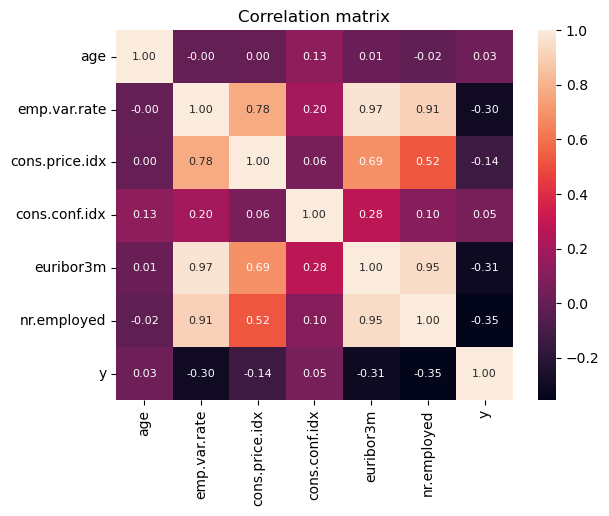

In [167]:
sns.heatmap(df[corr_cols].corr(), annot=True, fmt='.2f', annot_kws={'size':8})
plt.title('Correlation matrix')
plt.show()

There are some features that are highly correlated

There are:
> emp.var.rate i euribor3m → 0.972

> emp.var.rate i nr.employed → 0.907

> euribor3m i nr.employed → 0.945

Since nr.employed has the biggest correlation with target (-0.35), I will leave it, and drop emp.var.rate and euribor3m

In [170]:
df.drop(columns=['emp.var.rate', 'euribor3m'], axis=1, inplace=True)

## Train / test 

Feature matrix

In [173]:
X = df.drop(columns=['y'], axis=1)

Target column

In [175]:
y = df.y

In [176]:
seed = 42
test_size = 0.2

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed, stratify=y)

# ML algorithms

I'm goging to use GridSearchCV on ML models, using same scoring ROC-AUC. And I'm going to save best model from each algorithm

In [353]:
results_list = []
best_models_dict = {}

## K nearest neighbors KNN

In [182]:
pipeline = ImbPipeline([  
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=seed)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

In [183]:
param_grid = {
    'knn__n_neighbors': list(range(1, 21)),  # values for k
    'knn__weights': ['uniform', 'distance'], # uniform or distance weighting
    'knn__metric': ['euclidean', 'manhattan'] # metrics 
}

I'm going to use this same cv_strategy for all models in GridSearchCV

In [185]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [186]:
grid_search_knn = GridSearchCV(pipeline, param_grid, cv=cv_strategy, scoring='roc_auc', n_jobs=-1)

In [187]:
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20],
                         'knn__weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [188]:
print("Best parameters:", grid_search_knn.best_params_)
print("Best CV ROC AUC score:", grid_search_knn.best_score_)

Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 20, 'knn__weights': 'uniform'}
Best CV ROC AUC score: 0.7461738000518849


In [189]:
best_knn_model = grid_search_knn.best_estimator_

In [357]:
best_models_dict['KNN'] = best_knn_model

In [359]:
results_list.append({
    'Model': 'KNN',
    'Best Estimator': grid_search_knn.best_estimator_,
    'Best Params': grid_search_knn.best_params_,
    'Best CV ROC AUC': grid_search_knn.best_score_
})

## Logistic Regression LR

In [193]:
lr_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=seed)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
])

In [194]:
param_grid_lr = {
    'lr__C': [0.01, 0.1, 1, 10, 100],  # regularization
    'lr__penalty': ['l2'],             # only l2 for LogisticRegression with solver='lbfgs'
    'lr__solver': ['lbfgs', 'saga']    # big data + l2
}

In [195]:
grid_search_lr = GridSearchCV(lr_pipeline, param_grid_lr, cv=cv_strategy, scoring='roc_auc', n_jobs=-1)

In [196]:
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('lr',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'lr__C': [0.01, 0.1, 1, 10, 100],
                         'lr__penalty': ['l2'],
                         'lr__solver': ['lbfgs', 'saga']},
             scoring='roc_auc')

In [197]:
print("Best parameters:", grid_search_lr.best_params_)
print("Best CV ROC AUC score:", grid_search_lr.best_score_)

Best parameters: {'lr__C': 0.01, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
Best CV ROC AUC score: 0.7850373676996367


In [198]:
best_lr_model = grid_search_lr.best_estimator_

In [361]:
best_models_dict['LR'] = best_lr_model

In [363]:
results_list.append({
    'Model': 'LR',
    'Best Estimator': grid_search_lr.best_estimator_,
    'Best Params': grid_search_lr.best_params_,
    'Best CV ROC AUC': grid_search_lr.best_score_
})

## Linear Discriminant Analysis LDA

In [202]:
lda_pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=seed)),
    ('lda', LinearDiscriminantAnalysis())
])

In [203]:
param_grid_lda = [
    {
        'lda__solver': ['svd'],
        'lda__shrinkage': [None] #'svd' doesn't support shrinkage
    },
    {
        'lda__solver': ['lsqr'],
        'lda__shrinkage': [None, 'auto', 0.1, 0.3, 0.5, 0.7, 0.9] #without and with shrinkage
    }
]

In [204]:
grid_search_lda = GridSearchCV(lda_pipeline, param_grid_lda, cv=cv_strategy, scoring='roc_auc', n_jobs=-1)

In [205]:
grid_search_lda.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('lda', LinearDiscriminantAnalysis())]),
             n_jobs=-1,
             param_grid=[{'lda__shrinkage': [None], 'lda__solver': ['svd']},
                         {'lda__shrinkage': [None, 'auto', 0.1, 0.3, 0.5, 0.7,
                                             0.9],
                          'lda__solver': ['lsqr']}],
             scoring='roc_auc')

In [206]:
print("Best parameters:", grid_search_lda.best_params_)
print("Best CV ROC AUC score:", grid_search_lda.best_score_)

Best parameters: {'lda__shrinkage': 0.1, 'lda__solver': 'lsqr'}
Best CV ROC AUC score: 0.7851104750781058


In [207]:
best_lda_model = grid_search_lda.best_estimator_

In [365]:
best_models_dict['LDA'] = best_lda_model

In [367]:
results_list.append({
    'Model': 'LDA',
    'Best Estimator': grid_search_lda.best_estimator_,
    'Best Params': grid_search_lda.best_params_,
    'Best CV ROC AUC': grid_search_lda.best_score_
})

## Naive Bayes NB

In [211]:
gnb_pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=seed)),
    ('clf', GaussianNB())
])
#without scaling because GNB does not require strictly scaled data

In [212]:
param_grid_gnb = {
    'clf__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6] 
}

In [213]:
grid_search_gnb = GridSearchCV(gnb_pipeline, param_grid_gnb, cv=cv_strategy, scoring='roc_auc', n_jobs=-1)

In [214]:
grid_search_gnb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('clf', GaussianNB())]),
             n_jobs=-1,
             param_grid={'clf__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             scoring='roc_auc')

In [215]:
print("Best parameters:", grid_search_gnb.best_params_)
print("Best CV ROC AUC score:", grid_search_gnb.best_score_)

Best parameters: {'clf__var_smoothing': 1e-07}
Best CV ROC AUC score: 0.7497272910105635


In [216]:
best_gnb_model = grid_search_gnb.best_estimator_

In [369]:
best_models_dict['GNB'] = best_gnb_model

In [371]:
results_list.append({
    'Model': 'GNB',
    'Best Estimator': grid_search_gnb.best_estimator_,
    'Best Params': grid_search_gnb.best_params_,
    'Best CV ROC AUC': grid_search_gnb.best_score_
})

# BEST models

In [383]:
results_df = pd.DataFrame(results_list)
results_df

,Model,Best Estimator,Best Params,Best CV ROC AUC
0,KNN,"(StandardScaler(), SMOTE(random_state=42), KNe...","{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.746174
1,LR,"(StandardScaler(), SMOTE(random_state=42), Log...","{'lr__C': 0.01, 'lr__penalty': 'l2', 'lr__solv...",0.785037
2,LDA,"(StandardScaler(), SMOTE(random_state=42), Lin...","{'lda__shrinkage': 0.1, 'lda__solver': 'lsqr'}",0.785110
3,GNB,"(StandardScaler(), SMOTE(random_state=42), Gau...",{'clf__var_smoothing': 1e-07},0.749727


Logistic regression and LDA have practically the same results (0.785), but I'm gonna chose logistic reggresion here

In [385]:
best_model = best_lr_model

# Adjusting the classification threshold

In [417]:
y_proba = best_model.predict_proba(X_test)[:,1] #probability for class 1

Let's see ROC curve

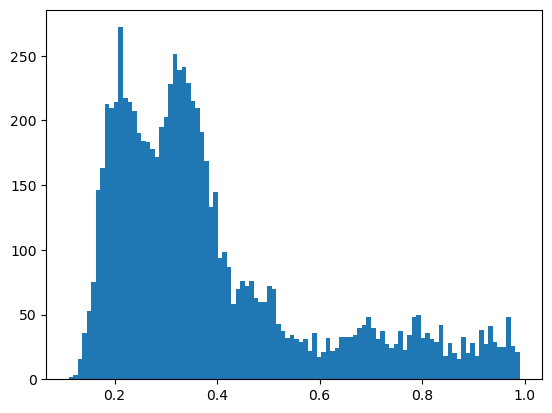

In [419]:
plt.hist(y_proba, bins=100)
plt.show()

Class 1 is rarely predictied, since only a small minority of the testing set observation had predicted probability above the threshold (0.5)

--------------------------------------------------------------------------------------------------------------------------------------------------------

Let's see ROC Curve:

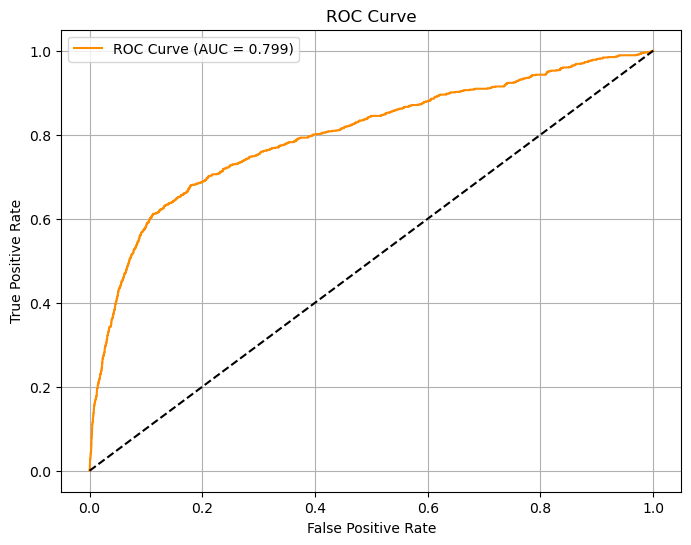

In [403]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

Let's see diffrent thresholds and their confusion reports

In [441]:
for thresh in [0.3, 0.5, 0.7]:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    print(f"\n--- Threshold: {thresh} ---")
    print(confusion_matrix(y_test, y_pred_thresh))
    print(classification_report(y_test, y_pred_thresh, digits=3))


--- Threshold: 0.3 ---
[[3126 4182]
 [ 120  808]]
              precision    recall  f1-score   support

           0      0.963     0.428     0.592      7308
           1      0.162     0.871     0.273       928

    accuracy                          0.478      8236
   macro avg      0.562     0.649     0.433      8236
weighted avg      0.873     0.478     0.556      8236


--- Threshold: 0.5 ---
[[6107 1201]
 [ 319  609]]
              precision    recall  f1-score   support

           0      0.950     0.836     0.889      7308
           1      0.336     0.656     0.445       928

    accuracy                          0.815      8236
   macro avg      0.643     0.746     0.667      8236
weighted avg      0.881     0.815     0.839      8236


--- Threshold: 0.7 ---
[[6771  537]
 [ 456  472]]
              precision    recall  f1-score   support

           0      0.937     0.927     0.932      7308
           1      0.468     0.509     0.487       928

    accuracy                 

At threshold 0.3, the model achieved very high recall (87.1%) but very low precision (16.2%), meaning it captured most positive cases but with many false positives.

At threshold 0.5, we observed a balanced performance with a recall of 65.6% and a precision of 33.6%.

At threshold 0.7, the model achieved the highest precision (46.8%) and the best F1-score (48.7%), indicating a better balance between false positives and false negatives.

--------------------------------------------------------------------------------------------------------------------------------------------------------

Let's see precision - recall curve:

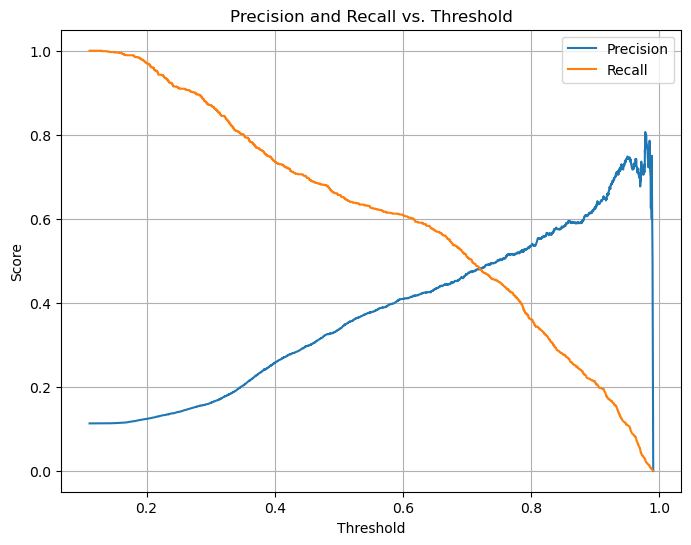

In [478]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid()
plt.show()

On the precision-recall vs. threshold plot, we observe that as the threshold increases, precision improves at the cost of recall.
Around threshold = 0.7, the model achieves a good balance, offering higher precision while maintaining moderate recall.
This threshold is chosen to prioritize the quality of positive predictions, which is suitable in the business context where contacting uninterested clients can be costly.

--------------------------------------------------------------------------------------------------------------------------------------------------------

Depending on business goals:

- If the aim is to maximize outreach, threshold 0.3 is preferable.

- If the goal is to minimize false positives and focus on the most likely subscribers, then threshold 0.7 is a better choice.

Although I did not apply the final model using .predict() on the test set, the analysis using predict_proba and performance metrics (confusion matrices, ROC curve, and precision-recall curve) provides a solid evaluation of the model's behavior under different threshold strategies.

This threshold analysis not only demonstrates the model's flexibility but also shows the importance of aligning evaluation metrics with real-world decision-making.